In [2]:
from preprocessing import get_datasets
from model_helper import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
train_dataset, validation_dataset, test_dataset = get_datasets(32)

In [5]:
model = Sequential([
    Conv2D(32, (6, 6), activation='relu', input_shape=(69, 69, 3)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(37, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)      

Epoch 1/100
1540/1540 [==============================] - 18s 11ms/step - loss: 0.2762 - accuracy: 0.6255 - root_mean_squared_error: 0.1422 - val_loss: 0.2584 - val_accuracy: 0.6774 - val_root_mean_squared_error: 0.1237
Epoch 2/100
1540/1540 [==============================] - 16s 10ms/step - loss: 0.2534 - accuracy: 0.7230 - root_mean_squared_error: 0.1165 - val_loss: 0.2469 - val_accuracy: 0.7420 - val_root_mean_squared_error: 0.1089
Epoch 3/100
1540/1540 [==============================] - 16s 10ms/step - loss: 0.2483 - accuracy: 0.7405 - root_mean_squared_error: 0.1098 - val_loss: 0.2453 - val_accuracy: 0.7522 - val_root_mean_squared_error: 0.1066
Epoch 4/100
1540/1540 [==============================] - 16s 10ms/step - loss: 0.2458 - accuracy: 0.7509 - root_mean_squared_error: 0.1063 - val_loss: 0.2432 - val_accuracy: 0.7665 - val_root_mean_squared_error: 0.1035
Epoch 5/100
1540/1540 [==============================] - 16s 10ms/step - loss: 0.2441 - accuracy: 0.7580 - root_mean_squared

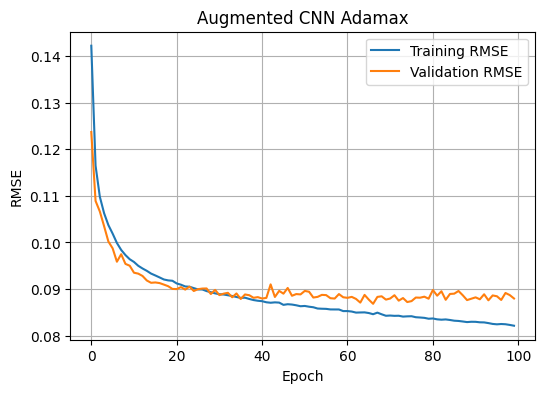

INFO:tensorflow:Assets written to: ./models/augmented_cnn_adamax/assets


INFO:tensorflow:Assets written to: ./models/augmented_cnn_adamax/assets


2500/2500 [==============================] - 8s 3ms/step


In [7]:
name = 'Augmented CNN Adamax'
history = compile_and_fit(model, train_dataset, validation_dataset, 100)
plot_history(history, name)
save(model, test_dataset, name)